In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import string
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import re
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 

import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to C:\Users\Mr.
[nltk_data]     Jarvis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mr.
[nltk_data]     Jarvis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
file = r"C:\Users\Mr. Jarvis\Desktop\PROJECT\PRINT FOLDER\uci-news-aggregator.csv"

In [3]:
news = pd.read_csv(file)

In [4]:
news

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
...,...,...,...,...,...,...,...,...
422414,422933,Surgeons to remove 4-year-old's rib to rebuild...,http://www.cbs3springfield.com/story/26378648/...,WSHM-TV,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.cbs3springfield.com,1409229190251
422415,422934,Boy to have surgery on esophagus after battery...,http://www.wlwt.com/news/boy-to-have-surgery-o...,WLWT Cincinnati,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wlwt.com,1409229190508
422416,422935,Child who swallowed battery to have reconstruc...,http://www.newsnet5.com/news/local-news/child-...,NewsNet5.com,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.newsnet5.com,1409229190771
422417,422936,Phoenix boy undergoes surgery to repair throat...,http://www.wfsb.com/story/26368078/phoenix-boy...,WFSB,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wfsb.com,1409229191071


In [5]:
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


#### Independent Features- [ID,TITLE,URL,PUBLISHER,STORY,HOSTNAME,TIMESTAMP]
#### Dependent Feature- 'CATEGORY'

In [12]:
news.dtypes

ID            int64
TITLE        object
URL          object
PUBLISHER    object
CATEGORY     object
STORY        object
HOSTNAME     object
TIMESTAMP     int64
dtype: object

In [13]:
news.isnull().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    2
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [14]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
ID           422419 non-null int64
TITLE        422419 non-null object
URL          422419 non-null object
PUBLISHER    422417 non-null object
CATEGORY     422419 non-null object
STORY        422419 non-null object
HOSTNAME     422419 non-null object
TIMESTAMP    422419 non-null int64
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [15]:
news["PUBLISHER"].value_counts()

Reuters              3902
Huffington Post      2455
Businessweek         2395
Contactmusic.com     2334
Daily Mail           2254
                     ... 
Ghana                   1
BCS                     1
IMSoup                  1
Borehamwood Times       1
Artiholics              1
Name: PUBLISHER, Length: 10985, dtype: int64

In [16]:
news['PUBLISHER'] = news['PUBLISHER'].fillna(news['PUBLISHER'].mode()[0])

In [17]:
news.isnull().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    0
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [18]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
ID           422419 non-null int64
TITLE        422419 non-null object
URL          422419 non-null object
PUBLISHER    422419 non-null object
CATEGORY     422419 non-null object
STORY        422419 non-null object
HOSTNAME     422419 non-null object
TIMESTAMP    422419 non-null int64
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [19]:
news.shape

(422419, 8)

In [24]:
print(news.duplicated())==True

0         False
1         False
2         False
3         False
4         False
          ...  
422414    False
422415    False
422416    False
422417    False
422418    False
Length: 422419, dtype: bool


False

In [26]:
print(' News Data Size {}'.format(news.shape))
if(any(news.duplicated())==True):
    print('Duplicate rows found')
    print('Number of duplicate rows= ',news[news.duplicated()].shape[0])
    df.drop_duplicates(inplace=True,keep='first')
    df.reset_index(inplace=True,drop=True)
    print('Dropping duplicates\n')
    print(news.shape)
else:
    print('NO Duplicate Data Found')

 News Data Size (422419, 8)
NO Duplicate Data Found


#### Distribution of 'CATEGORY' (Dependent Variable)

In [27]:
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [28]:
news["CATEGORY"].value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

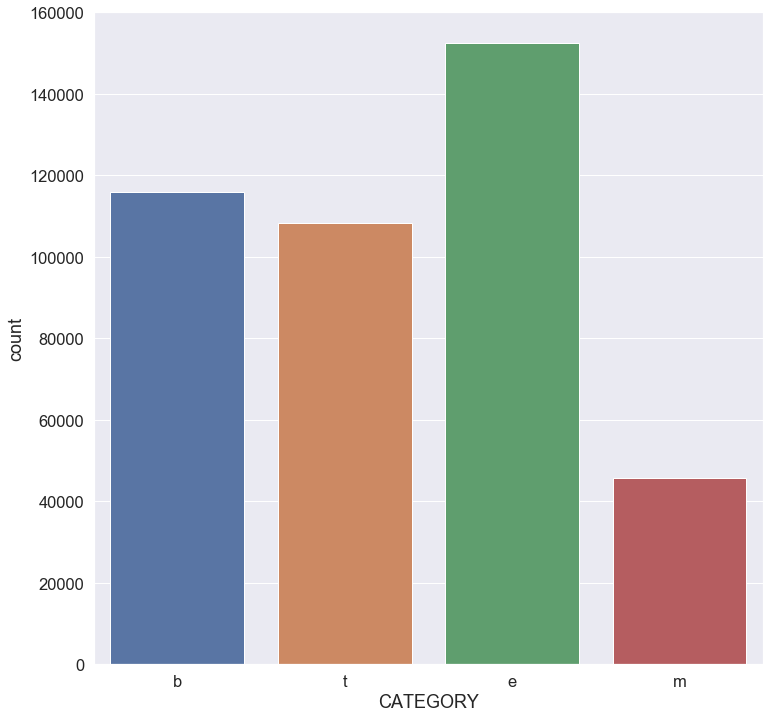

In [29]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,12))
sns.countplot(news['CATEGORY'])

In [30]:
def label_to_name(label):
    if(label=='e'):
        return 'entertainment'
    elif(label=='b'):
        return 'business'
    elif(label=='t'):
        return 'science and technology'
    else:
        return 'health'

In [31]:
news['CATEGORY'] = news['CATEGORY'].apply(label_to_name)

In [32]:
news["CATEGORY"].value_counts()

entertainment             152469
business                  115967
science and technology    108344
health                     45639
Name: CATEGORY, dtype: int64

In [38]:
print('Distribution of labels in %\n')
print(news['CATEGORY'].value_counts()/news.shape[0]*100)

Distribution of labels in %

entertainment             36.094257
business                  27.453074
science and technology    25.648468
health                    10.804202
Name: CATEGORY, dtype: float64


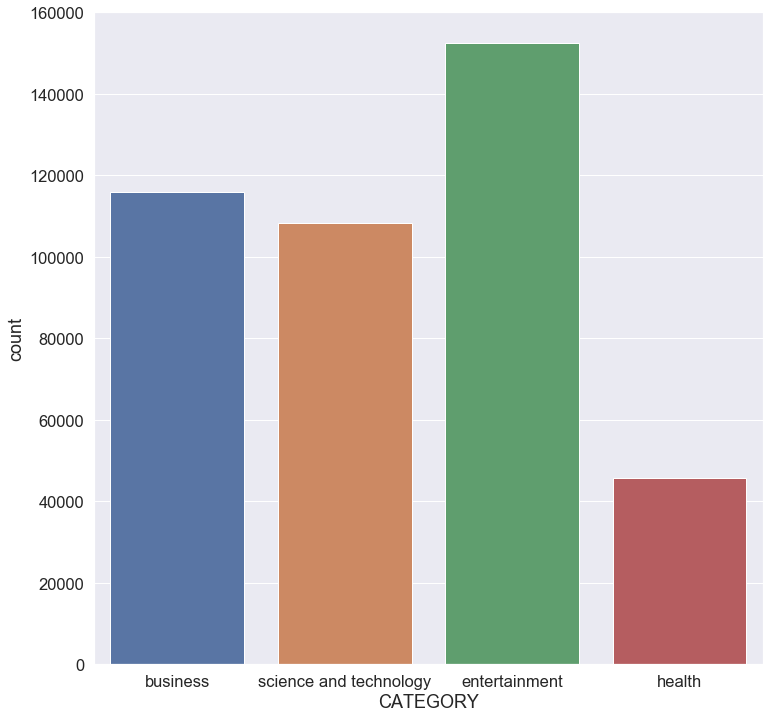

In [39]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,12))
sns.countplot(news['CATEGORY'])

In [ ]:
# Dropping features [ID,URL,PUBLISHER,STORY,HOSTNAME,TIMESTAMP]

In [40]:
news.drop(columns=['ID','URL','PUBLISHER','STORY','HOSTNAME','TIMESTAMP'],inplace=True)

In [41]:
# lowercasing
news['lower'] = news['TITLE'].str.lower()

In [42]:
news.head()

,TITLE,CATEGORY,lower
0,"Fed official says weak data caused by weather,...",business,"fed official says weak data caused by weather,..."
1,Fed's Charles Plosser sees high bar for change...,business,fed's charles plosser sees high bar for change...
2,US open: Stocks fall after Fed official hints ...,business,us open: stocks fall after fed official hints ...
3,"Fed risks falling 'behind the curve', Charles ...",business,"fed risks falling 'behind the curve', charles ..."
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business,fed's plosser: nasty weather has curbed job gr...


In [43]:
## Punctuation removing

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
news["punc_removed"] = news["lower"].apply(lambda text: remove_punctuation(text))

In [44]:
news.head()

,TITLE,CATEGORY,lower,punc_removed
0,"Fed official says weak data caused by weather,...",business,"fed official says weak data caused by weather,...",fed official says weak data caused by weather ...
1,Fed's Charles Plosser sees high bar for change...,business,fed's charles plosser sees high bar for change...,feds charles plosser sees high bar for change ...
2,US open: Stocks fall after Fed official hints ...,business,us open: stocks fall after fed official hints ...,us open stocks fall after fed official hints a...
3,"Fed risks falling 'behind the curve', Charles ...",business,"fed risks falling 'behind the curve', charles ...",fed risks falling behind the curve charles plo...
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business,fed's plosser: nasty weather has curbed job gr...,feds plosser nasty weather has curbed job growth


In [45]:
## stopwords removing

STOPWORDS = set(stopwords.words('english'))

In [46]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [47]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [48]:
news["stopwords_removed"] = news["punc_removed"].apply(lambda text: remove_stopwords(text))

In [49]:
news.head()

,TITLE,CATEGORY,lower,punc_removed,stopwords_removed
0,"Fed official says weak data caused by weather,...",business,"fed official says weak data caused by weather,...",fed official says weak data caused by weather ...,fed official says weak data caused weather slo...
1,Fed's Charles Plosser sees high bar for change...,business,fed's charles plosser sees high bar for change...,feds charles plosser sees high bar for change ...,feds charles plosser sees high bar change pace...
2,US open: Stocks fall after Fed official hints ...,business,us open: stocks fall after fed official hints ...,us open stocks fall after fed official hints a...,us open stocks fall fed official hints acceler...
3,"Fed risks falling 'behind the curve', Charles ...",business,"fed risks falling 'behind the curve', charles ...",fed risks falling behind the curve charles plo...,fed risks falling behind curve charles plosser...
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business,fed's plosser: nasty weather has curbed job gr...,feds plosser nasty weather has curbed job growth,feds plosser nasty weather curbed job growth


#### A Wordcloud (or Tag cloud) is a visual representation of text data. It displays a list of words, the importance of each beeing shown with font size or color. This format is useful for quickly perceiving the most prominent terms. Python is.

### Wordcloud Tutorial = https://www.datacamp.com/community/tutorials/wordcloud-python

In [55]:
comment_words = " "

In [56]:
comment_words

' '

In [52]:
stopwords = set(STOPWORDS)

In [53]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [58]:
for val in news.stopwords_removed[0:10000]:  
    tokens = val.split()     
    for words in tokens: 
        comment_words = comment_words + words + ' '

In [59]:
wordcloud = WordCloud(width = 1000, height = 900, background_color ='white', 
                      stopwords = stopwords, min_font_size = 15).generate(comment_words)

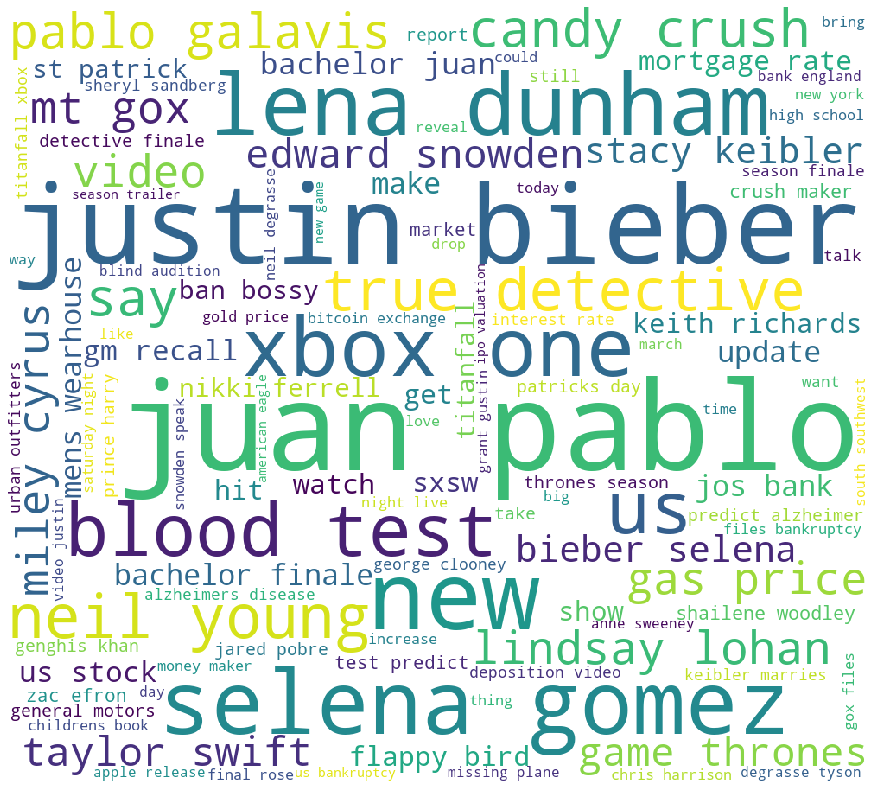

In [62]:
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Dealing with catogorical data

In [63]:
news.head()

,TITLE,CATEGORY,lower,punc_removed,stopwords_removed
0,"Fed official says weak data caused by weather,...",business,"fed official says weak data caused by weather,...",fed official says weak data caused by weather ...,fed official says weak data caused weather slo...
1,Fed's Charles Plosser sees high bar for change...,business,fed's charles plosser sees high bar for change...,feds charles plosser sees high bar for change ...,feds charles plosser sees high bar change pace...
2,US open: Stocks fall after Fed official hints ...,business,us open: stocks fall after fed official hints ...,us open stocks fall after fed official hints a...,us open stocks fall fed official hints acceler...
3,"Fed risks falling 'behind the curve', Charles ...",business,"fed risks falling 'behind the curve', charles ...",fed risks falling behind the curve charles plo...,fed risks falling behind curve charles plosser...
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business,fed's plosser: nasty weather has curbed job gr...,feds plosser nasty weather has curbed job growth,feds plosser nasty weather curbed job growth


In [64]:
news.CATEGORY.value_counts()

entertainment             152469
business                  115967
science and technology    108344
health                     45639
Name: CATEGORY, dtype: int64

In [65]:
le = LabelEncoder()

In [66]:
news['CATEGORY']=le.fit_transform(news['CATEGORY'])

In [67]:
news.head()

,TITLE,CATEGORY,lower,punc_removed,stopwords_removed
0,"Fed official says weak data caused by weather,...",0,"fed official says weak data caused by weather,...",fed official says weak data caused by weather ...,fed official says weak data caused weather slo...
1,Fed's Charles Plosser sees high bar for change...,0,fed's charles plosser sees high bar for change...,feds charles plosser sees high bar for change ...,feds charles plosser sees high bar change pace...
2,US open: Stocks fall after Fed official hints ...,0,us open: stocks fall after fed official hints ...,us open stocks fall after fed official hints a...,us open stocks fall fed official hints acceler...
3,"Fed risks falling 'behind the curve', Charles ...",0,"fed risks falling 'behind the curve', charles ...",fed risks falling behind the curve charles plo...,fed risks falling behind curve charles plosser...
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,0,fed's plosser: nasty weather has curbed job gr...,feds plosser nasty weather has curbed job growth,feds plosser nasty weather curbed job growth


In [69]:
news.CATEGORY.value_counts()

1    152469
0    115967
3    108344
2     45639
Name: CATEGORY, dtype: int64

#### Results using CountVectorizer

In [70]:
vectorizer = CountVectorizer()

In [71]:
x = vectorizer.fit_transform(news['stopwords_removed'])

In [72]:
y = news['CATEGORY']

#### splitting the data

In [73]:
?train_test_split

#### stratify : array-like or None (default=None)
####    If not None, data is split in a stratified fashion, using this as
#####    the class labels.

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , stratify = news["CATEGORY"])

In [75]:
x_train.shape

(337935, 71746)

In [76]:
y_train.shape

(337935,)

In [77]:
x_test.shape

(84484, 71746)

In [78]:
y_test.shape

(84484,)

In [79]:
result = pd.DataFrame(columns=['Model_Name','Accuracy_Score','F1-score'])

In [80]:
result

,Model_Name,Accuracy_Score,F1-score


In [81]:
models_name = ['Logistic Regression' , 'Multinomial NaiveBayes']

In [82]:
models_name

['Logistic Regression', 'Multinomial NaiveBayes']

In [83]:
model_clf = [LogisticRegression() , MultinomialNB()]

In [84]:
model_clf

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)]

In [85]:
for index,model in enumerate(model_clf):
    clf = model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    result.loc[index] = [models_name[index],accuracy_score(y_test, predictions),f1_score(y_test , predictions ,
                                                                                             average = 'weighted')]

C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [86]:
result

,Model_Name,Accuracy_Score,F1-score
0,Logistic Regression,0.947327,0.947266
1,Multinomial NaiveBayes,0.928247,0.928240


In [88]:
result

,Model_Name,Accuracy_Score,F1-score_Score
0,Logistic Regression,0.947327,0.947266
1,Multinomial NaiveBayes,0.928247,0.928240


In [104]:
confusion_matrix(predictions , y_test)

array([[21032,   385,   344,  1396],
       [  388, 29411,   281,   440],
       [  360,   177,  8359,   213],
       [ 1413,   521,   144, 19620]], dtype=int64)

In [106]:
print(classification_report(predictions , y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     23157
           1       0.96      0.96      0.96     30520
           2       0.92      0.92      0.92      9109
           3       0.91      0.90      0.90     21698

    accuracy                           0.93     84484
   macro avg       0.92      0.92      0.92     84484
weighted avg       0.93      0.93      0.93     84484



#### result using TF-IDF

#### TF-IDF stands for “Term Frequency — Inverse Data Frequency”.
#### Term Frequency (tf): gives us the frequency of the word in each document in the corpus. 
#### It is the ratio of number of times the word appears in a document compared to the total number of words in that document

In [108]:
tfidf = TfidfVectorizer()

In [109]:
x = tfidf.fit_transform(news['stopwords_removed'].values)

In [110]:
y = news['CATEGORY']

In [111]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , stratify=news.CATEGORY)

In [112]:
x_train.shape

(337935, 71746)

In [113]:
y_train.shape

(337935,)

In [114]:
x_test.shape

(84484, 71746)

In [115]:
y_test.shape

(84484,)

In [116]:
result = pd.DataFrame(columns=['Model_Name' , 'Accuracy_score' ,'F1-score'])

In [117]:
result

,Model_Name,Accuracy_score,F1-score


In [118]:
models_name = ['Logistic Regression' , 'Multinomial NaiveBayes']

In [119]:
models_name

['Logistic Regression', 'Multinomial NaiveBayes']

In [120]:
model_clfs = [LogisticRegression() , MultinomialNB()]

In [121]:
model_clfs

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)]

In [122]:
for index,model in enumerate(model_clfs):
    clfs = model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    result.loc[index] = [models_name[index] , accuracy_score(y_test, predictions) , f1_score(y_test, predictions, average = 'weighted')]

C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [123]:
result

,Model_Name,Accuracy_score,F1-score
0,Logistic Regression,0.942297,0.942153
1,Multinomial NaiveBayes,0.925797,0.925521


In [119]:
result

,Model_Name,Accuracy_score,F1-score
0,Logistic Regression,0.942297,0.942153
1,Multinomial NaiveBayes,0.925797,0.925521


In [125]:
confusion_matrix(predictions , y_test)

array([[21221,   353,   586,  1438],
       [  509, 29680,   553,   596],
       [  123,    46,  7755,    76],
       [ 1340,   415,   234, 19559]], dtype=int64)

In [126]:
print(classification_report(predictions , y_test))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     23598
           1       0.97      0.95      0.96     31338
           2       0.85      0.97      0.91      8000
           3       0.90      0.91      0.91     21548

    accuracy                           0.93     84484
   macro avg       0.91      0.93      0.92     84484
weighted avg       0.93      0.93      0.93     84484



#### LSTM for deep learning model

#### The Long Short-Term Memory network, or LSTM for short, is a type of recurrent neural network that achieves state-of-the-art results on challenging prediction problems.

In [127]:
import keras
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping,ModelCheckpoint

import os

Using TensorFlow backend.


In [172]:
news_labels = to_categorical(news['CATEGORY'], num_classes=4)

In [173]:
news_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [174]:
n_most_common_words = 11000

In [175]:
max_len = 130

In [176]:
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [177]:
tokenizer

In [178]:
tokenizer.fit_on_texts(news["lower"].values)

In [179]:
sequence = tokenizer.texts_to_sequences(news["lower"].values)

In [180]:
sequence

[[215, 452, 25, 1061, 84, 1968, 19, 1080, 269, 37, 1410, 7893],
 [1933, 6722, 8792, 547, 112, 2810, 5, 142, 2, 2397, 4, 10733],
 [13, 311, 61, 222, 16, 215, 452, 1527, 11, 10733],
 [215, 1362, 2123, 3, 6722, 8792, 25],
 [1933, 8792, 7249, 1080, 56, 594, 175],
 [8792, 215, 31, 85, 1, 6466, 10733, 2397],
 [1933, 8792, 7893, 2397, 31, 20, 405, 1410],
 [1933, 8792, 2591, 13, 577, 1, 222, 1, 78, 26, 19, 3, 204, 4, 21],
 [13, 238, 175, 264, 232, 227, 19, 1080, 215, 721, 6722, 8792],
 [302, 3119, 1, 204, 4, 2444, 2388],
 [302, 3119, 1, 204, 4, 2444, 2388],
 [8931, 685, 140, 2596, 65, 642],
 [555, 1023, 2011, 6, 2852, 2596],
 [302, 915, 2212, 233, 39, 2711, 1736, 1, 691, 192, 248, 5],
 [775, 1504, 5, 64, 6, 6239, 694],
 [922, 1254, 353, 1, 38, 232, 2700, 154, 233],
 [9295, 25, 511, 233, 2256, 703, 1345],
 [775, 114, 226, 268, 119, 492, 140, 4179, 5231, 327],
 [302, 3760, 9295, 12, 3504, 311, 1, 100, 4],
 [233, 14, 99, 5039, 5921, 1168, 4107],
 [9295, 25, 511, 233, 2256, 703, 1345, 30],
 [9295,

In [181]:
word_index = tokenizer.word_index

In [182]:
word_index

{'to': 1,
 'in': 2,
 'the': 3,
 'of': 4,
 'for': 5,
 'on': 6,
 'and': 7,
 'a': 8,
 'with': 9,
 'new': 10,
 'at': 11,
 'is': 12,
 'us': 13,
 'as': 14,
 'from': 15,
 'after': 16,
 'up': 17,
 'google': 18,
 'by': 19,
 'be': 20,
 '2014': 21,
 'video': 22,
 'apple': 23,
 'will': 24,
 'says': 25,
 '2': 26,
 'over': 27,
 'more': 28,
 'first': 29,
 '1': 30,
 'may': 31,
 'samsung': 32,
 '4': 33,
 '3': 34,
 'you': 35,
 'about': 36,
 'not': 37,
 'one': 38,
 'out': 39,
 '5': 40,
 'galaxy': 41,
 'microsoft': 42,
 'report': 43,
 'it': 44,
 'are': 45,
 'watch': 46,
 'facebook': 47,
 'kim': 48,
 'season': 49,
 'day': 50,
 'this': 51,
 'your': 52,
 'review': 53,
 'million': 54,
 'kardashian': 55,
 'has': 56,
 'but': 57,
 "'the": 58,
 'sales': 59,
 'off': 60,
 'stocks': 61,
 'china': 62,
 'its': 63,
 'deal': 64,
 'could': 65,
 'her': 66,
 'update': 67,
 'star': 68,
 's': 69,
 'year': 70,
 'how': 71,
 'study': 72,
 'that': 73,
 'what': 74,
 'news': 75,
 'movie': 76,
 'amazon': 77,
 '6': 78,
 'time': 79,


In [183]:
print('Found %s unique tokens.' % len(word_index))

Found 75583 unique tokens.


#### This function transforms a list (of length num_samples ) of sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps) .
#### Sequences longer than num_timesteps are truncated so that they fit the desired length

In [184]:
?pad_sequences

In [185]:
X = pad_sequences(sequence , maxlen = max_len)

In [186]:
X

array([[    0,     0,     0, ...,    37,  1410,  7893],
       [    0,     0,     0, ...,  2397,     4, 10733],
       [    0,     0,     0, ...,  1527,    11, 10733],
       ...,
       [    0,     0,     0, ...,  1866,    11, 10563],
       [    0,     0,     0, ...,  6363,    34,  3874],
       [    0,     0,     0, ...,  1563,    34,  4752]])

In [187]:
x_train, x_test, y_train, y_test = train_test_split(X , news_labels, test_size=0.2, random_state=42, stratify = news.CATEGORY)

In [188]:
X.shape

(422419, 130)

In [189]:
x_train.shape

(337935, 130)

In [190]:
x_test.shape

(84484, 130)

In [191]:
y_train.shape

(337935, 4)

In [192]:
y_test.shape

(84484, 4)

In [193]:
epochs = 11

In [194]:
emb_dim = 160

In [195]:
batch_size = 258

In [196]:
?Sequential

In [197]:
model = Sequential()

In [198]:
model.add(Embedding(n_most_common_words, emb_dim, input_length = X.shape[1]))

#### An alternative way to use dropout with convolutional neural networks is to dropout entire feature maps from the convolutional layer which are then not used during pooling. This is called spatial dropout (or “SpatialDropout“). ... — Efficient Object Localization Using Convolutional Networks

In [199]:
model.add(SpatialDropout1D(0.2))

In [200]:
?LSTM

In [201]:
model.add(LSTM(100, dropout=0.15, recurrent_dropout=0.15))

In [202]:
model.add(Dense(4, activation='softmax'))

In [203]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [204]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 130, 160)          1760000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 130, 160)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               104400    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
Total params: 1,864,804
Trainable params: 1,864,804
Non-trainable params: 0
_________________________________________________________________
None


#### How to load a model from an HDF5 file in Keras
#### https://intellipaat.com/community/2962/how-to-load-a-model-from-an-hdf5-file-in-keras
#### https://stackoverflow.com/questions/35074549/how-to-load-a-model-from-an-hdf5-file-in-keras

In [205]:
filepath="weights.best.hdf5"

In [206]:
?ModelCheckpoint

In [207]:
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [208]:
callback_list = [checkpoint]

In [209]:
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(x_test,y_test),
                    callbacks = callback_list)

C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 337935 samples, validate on 84484 samples
Epoch 1/11
337935/337935 [==============================] - 1032s 3ms/step - loss: 0.2665 - acc: 0.9029 - val_loss: 0.1802 - val_acc: 0.9367

Epoch 00001: val_acc improved from -inf to 0.93667, saving model to weights.best.hdf5
Epoch 2/11
337935/337935 [==============================] - 1029s 3ms/step - loss: 0.1639 - acc: 0.9419 - val_loss: 0.1745 - val_acc: 0.9381

Epoch 00002: val_acc improved from 0.93667 to 0.93813, saving model to weights.best.hdf5
Epoch 3/11
337935/337935 [==============================] - 1020s 3ms/step - loss: 0.1455 - acc: 0.9477 - val_loss: 0.1670 - val_acc: 0.9402

Epoch 00003: val_acc improved from 0.93813 to 0.94019, saving model to weights.best.hdf5
Epoch 4/11
337935/337935 [==============================] - 1024s 3ms/step - loss: 0.1311 - acc: 0.9519 - val_loss: 0.1685 - val_acc: 0.9416

Epoch 00004: val_acc improved from 0.94019 to 0.94160, saving model to weights.best.hdf5
Epoch 5/11
337935/337935 [==

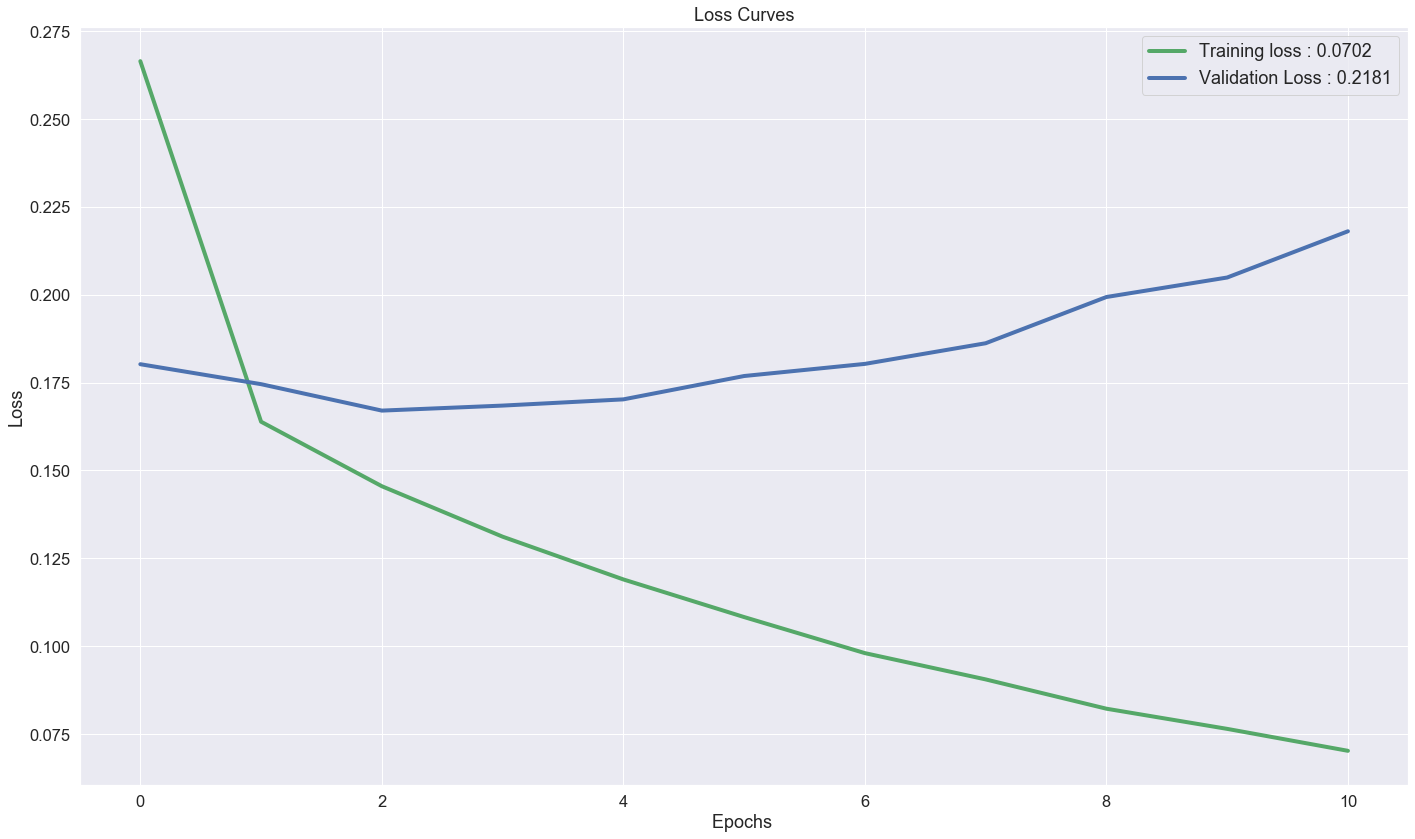

In [244]:
plt.figure(figsize=(20,12))
plt.subplot()
plt.title("Loss Curves")
plt.plot(history.history["loss"], color="g", label="Training loss",linewidth=4)
plt.plot(history.history["val_loss"], color="b", label="Validation loss",linewidth=4)
plt.legend(['Training loss : 0.0702', 'Validation Loss : 0.2181'],fontsize=18)
plt.xlabel('Epochs ',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.tight_layout()
plt.show()

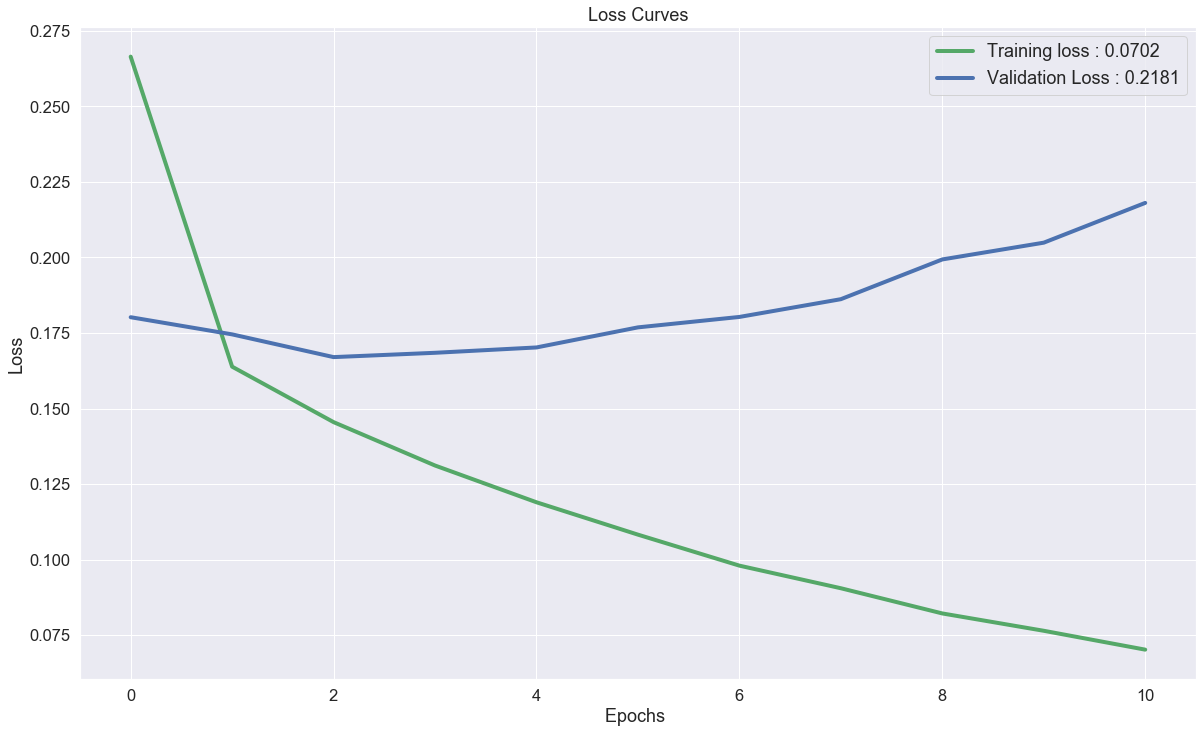

In [245]:
plt.figure(figsize=(20,12))
plt.plot(history.history['loss'],'g',linewidth=4)
plt.plot(history.history['val_loss'],'b',linewidth=4)
plt.legend(['Training loss : 0.0702', 'Validation Loss : 0.2181'],fontsize=18)
plt.xlabel('Epochs ',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.title('Loss Curves',fontsize=18)
plt.show()

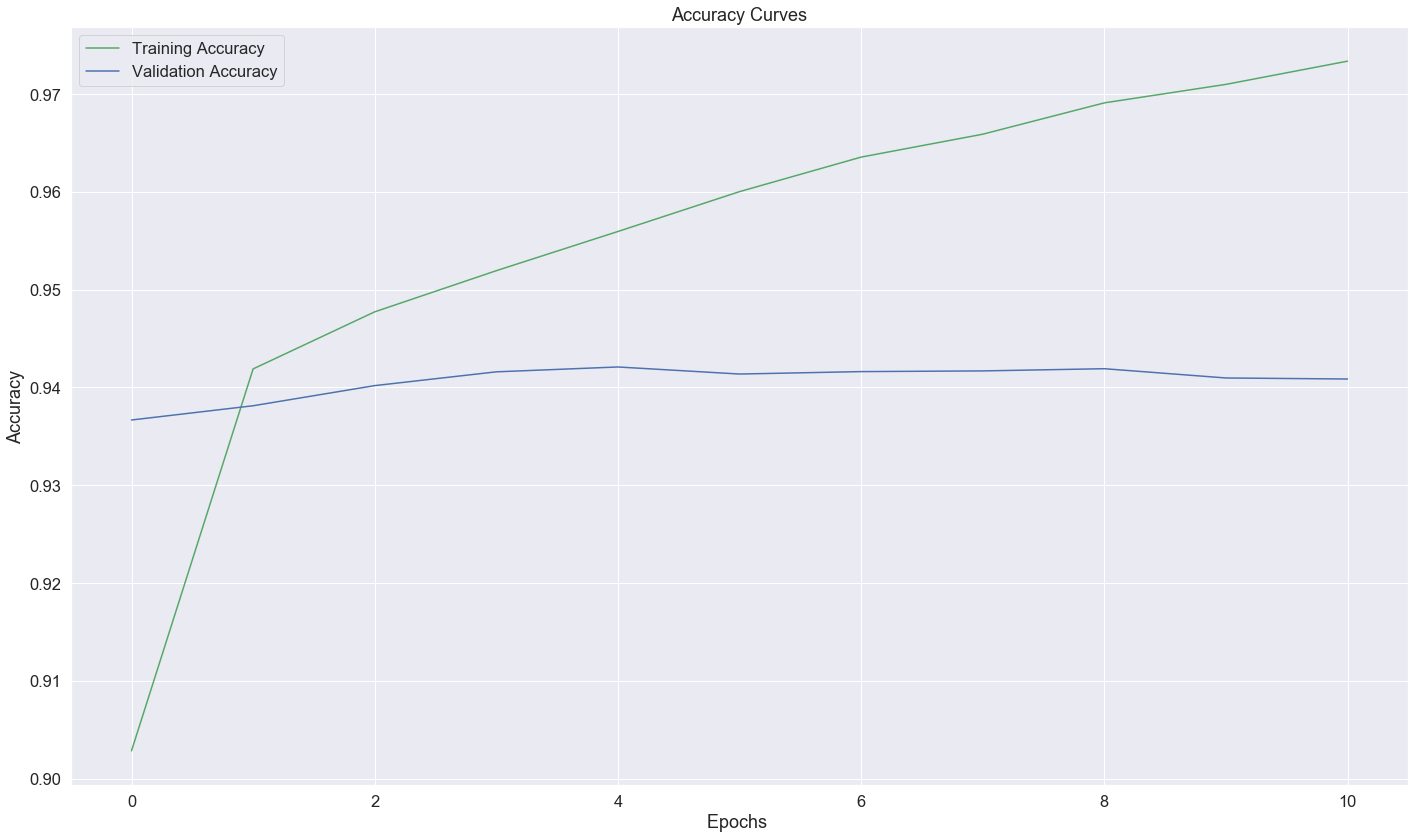

In [237]:
plt.figure(figsize=(20,12))
plt.subplot()
plt.title("Accuracy Curves")
plt.plot(history.history["acc"], color="g", label="Training Accuracy")
plt.plot(history.history["val_acc"], color="b", label="Validation Accuracy")
plt.legend(loc="best")
plt.xlabel('Epochs ',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.tight_layout()
plt.show()

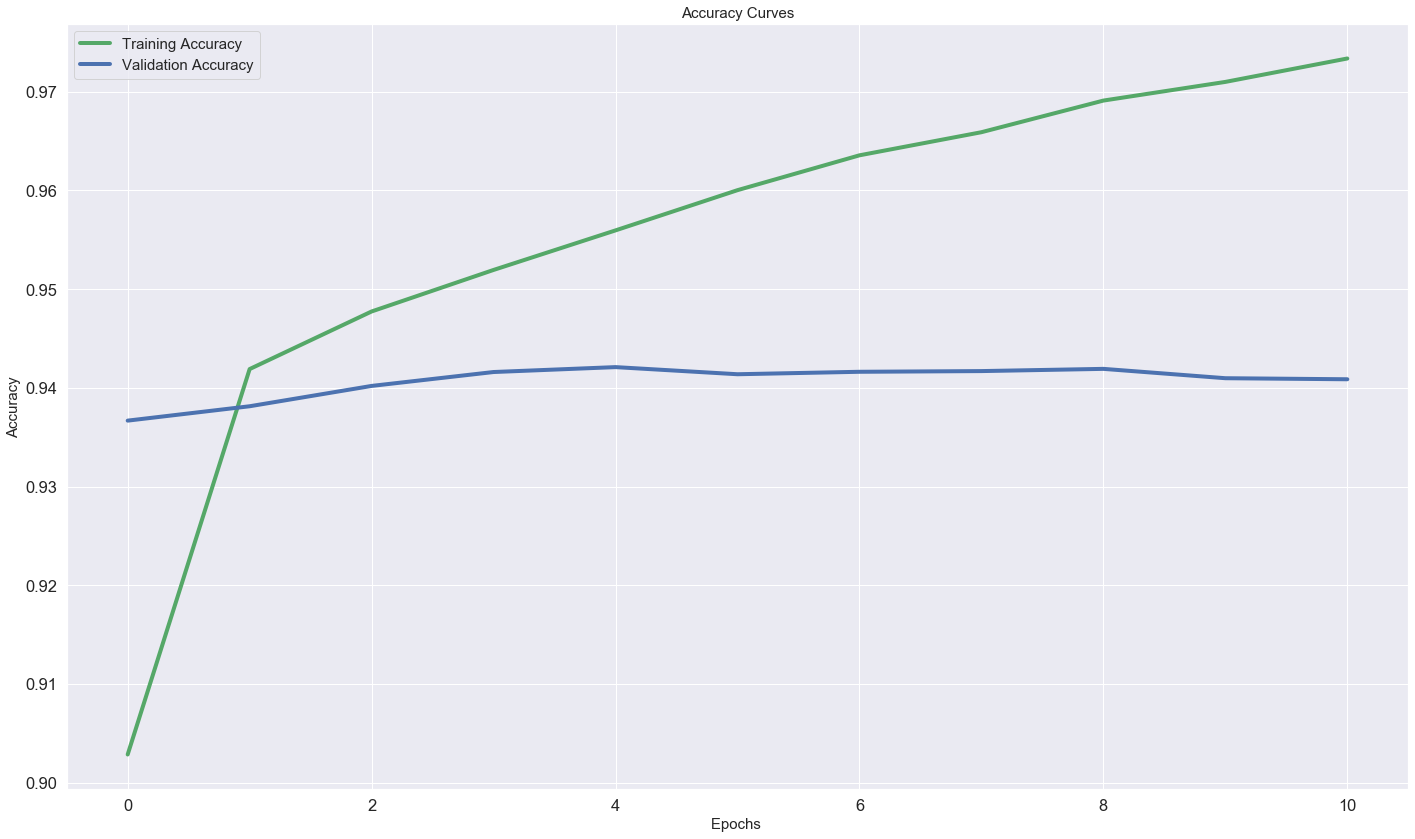

In [247]:
plt.figure(figsize=(20,12))
plt.subplot()
plt.plot(history.history['acc'],'g',linewidth=4)
plt.plot(history.history['val_acc'],'b',linewidth=4)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Curves',fontsize=15)
plt.tight_layout()
plt.show()

In [249]:
print("** Results for LSTM Model **\n")
predictions = model.predict_classes(x_test)
print("Accuracy score: ", accuracy_score(y_test.argmax(1), predictions))
print("F1 score: ", f1_score(y_test.argmax(1), predictions, average = 'weighted'))

** Results for LSTM Model **

Accuracy score:  0.9408645423985607
F1 score:  0.9408163837758586


In [254]:
print("** Results for LSTM Model **\n")
predictions = model.predict_classes(x_test)
print("Accuracy score: ", accuracy_score(y_test.argmax(1), predictions))
print("F1 score: ", f1_score(y_test.argmax(1), predictions, average = 'weighted'))

** Results for LSTM Model **

Accuracy score:  0.9408645423985607
F1 score:  0.9408163837758586


In [256]:
BATCH_SIZE = 32

In [257]:
score, acc = model.evaluate(x_test, y_test, batch_size = BATCH_SIZE , verbose = 0)
print("Test score: %.3f, accuracy: %.3f" % (score,acc))

Test score: 0.218, accuracy: 0.941
